# **Initialization and Loading dataset**


In [1]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
pip install catboost

     |████████████████████████████████| 64.4MB 77kB/s 


In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from imageio import imread
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix, hstack
from xgboost import XGBRegressor
from catboost import CatBoostRegressor,Pool
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
from sklearn.metrics import mean_absolute_error 
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


In [0]:
# Loading the Dataset
df=pd.read_csv(r'/content/drive/My Drive/dataset.csv')

# **Data Preprocessing**




In [6]:
df.head()

,Unique Id,Image,Brand,Title,Specifications,Highlights,Price,Rating
0,0697f1714bf848c4b1cacc39a46a4e8b,https://images-na.ssl-images-amazon.com/images...,RoadPro,RoadPro RP-100C 10' AM/FM Antenna Coaxial Cable,"[{'Brand': 'RoadPro'}, {'Model': 'RP-100C'}, {...",Make sure this fits by entering your model num...,12.99,4.7
1,f04481fec10c4a538634d01e04bb45ed,https://images-na.ssl-images-amazon.com/images...,YSense,5-6 Packs Baby Girl Cute Headband - Turban Hea...,[{}],"Material: Made of elastic synthetic cotton, so...",9.99,5.0
2,754577bc25b24641ab1b0aef5e19db73,https://images-na.ssl-images-amazon.com/images...,Wooden Camera,Wooden Camera - PL Mount (Weapon/Scarlet-W/Epi...,[{'Product Dimensions': '3.2 x 1.8 x 3.2 inche...,Make sure this fits by entering your model num...,379.18,3.3
3,b4c5f6d192124d70919946ea754cce56,https://images-na.ssl-images-amazon.com/images...,Global-store,Globalstore 12x25 Folding High-Grade Binocular...,[{'Product Dimensions': '3.9 x 3.9 x 2 inches'...,Make sure this fits by entering your model num...,19.97,5.0
4,b1a1b9c3926b4da1ab0040ea81b41e3e,https://images-na.ssl-images-amazon.com/images...,GBTIGER,"120 inch Portable Projection Screen with Bag, ...","[{'Brand Name': 'GBTIGER'}, {'Item Weight': '2...",Make sure this fits by entering your model num...,27.99,3.0


In [7]:
df.nunique()

Unique Id         51500
Image             47368
Brand             25740
Title             50873
Specifications    26333
Highlights        44791
Price              9741
Rating               42
dtype: int64

In [8]:
df.isnull().sum()

Unique Id            0
Image             3533
Brand                3
Title                1
Specifications       0
Highlights           2
Price                0
Rating               0
dtype: int64

In [9]:
df.dtypes

Unique Id          object
Image              object
Brand              object
Title              object
Specifications     object
Highlights         object
Price              object
Rating            float64
dtype: object

In [10]:
df['Price'].value_counts()

not_available    3499
9.99             1236
12.99             893
19.99             877
14.99             791
                 ... 
30.34               1
70.5                1
75.3                1
155.94              1
659.56              1
Name: Price, Length: 9741, dtype: int64

In [11]:
df['Highlights'].value_counts()

not_available                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [12]:
df['Title'].value_counts()

not_available                                                                                                                                              158
The Children's Place Boys' Bootcut Jeans                                                                                                                     5
Ultra Game Adult Men T Athletic Quick Dry Active Tee Shirt                                                                                                   4
YiZYiF Girls Kids Summer Two Pieces Tankini Racer-Back Tank Tops and Boyshort Skirt Swimsuit Swimwear Set                                                    3
MOFEVER Kids Toddler Neoprene Boots                                                                                                                          3
                                                                                                                                                          ... 
24-Karat Gold Dust Shimmer Powder             

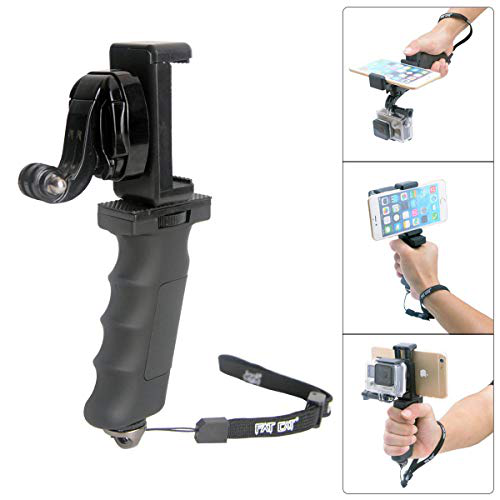

In [13]:
image=imread(df['Image'][124])
img=Image.fromarray(image,'RGB')
img

In [14]:
df['Specifications'][0]

"[{'Brand': 'RoadPro'}, {'Model': 'RP-100C'}, {'Item Weight': '3.2 ounces'}, {'Product Dimensions': '5 x 5 x 5 inches'}, {'Item model number': 'RP-100C'}, {'Manufacturer Part Number': 'RP-100C'}, {'Folding': 'No'}]"

In [15]:
df['Rating'].value_counts()

0.0    19104
5.0     5970
4.0     2202
4.5     1878
4.3     1846
4.4     1769
4.2     1761
4.1     1602
4.6     1537
3.9     1420
4.7     1288
3.8     1161
3.7     1125
3.6      953
3.5      934
3.0      898
4.8      836
3.4      725
1.0      661
3.3      640
3.2      487
3.1      454
2.9      353
4.9      338
2.0      322
2.8      235
2.7      210
2.6      179
2.5      177
2.4      113
2.3       68
2.1       57
2.2       46
1.5       40
1.9       38
1.4       18
1.6       16
1.8       14
1.7       13
1.3        9
1.2        2
1.1        1
Name: Rating, dtype: int64

###**Conclusions :**

**1:** Considering "Unique Id", "Image" and "Specifications" to be not much useful, they shall be removed from the dataset.


*   Image of the product also contains other object than the product like for a shirt, man is dressed up with the shirt and also it contains pictures of other irrelevant information. 
*   Specification  column comprises the dictionary of the items specs.
It includes Model No,Manufacturer Details which are not very useful for price predication. 



**2:** Rows having price value as "not_available" need to be removed as there is no meaning of replacing them with mean/median as different items have different prices.

**3:** "Price" needs to be converted from object to float.

**4:** Replacing "not_available" values in Brand, Title and Highlights

**5:** Normalize  rating.

In [0]:
# For Conclusion 1
df.drop(['Unique Id','Image', 'Specifications'],axis=1,inplace=True)

# For Conclusion 2
df=df[df['Price']!="not_available"]

# For Conclusion 3
df['Price']=df['Price'].astype(float)

# For Conclusion 4
df['Title'].replace("not_available","missing",inplace=True)
df['Highlights'].replace("not_available","missing",inplace=True)
df['Brand'].fillna(value="missing",inplace=True)
df['Title'].fillna(value="missing",inplace=True)
df['Highlights'].fillna(value="missing",inplace=True)

# For Conclusion 5
ss = StandardScaler()
X_rating = ss.fit_transform(df['Rating'].to_numpy().reshape(-1,1))

# **Data Analysis**




**PRICE**

Text(0.5, 1.0, 'Price Distribution')

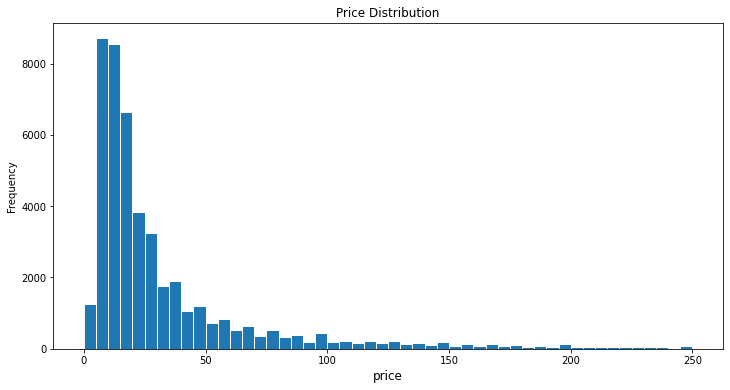

In [17]:
#Distribution of Price
df['Price'].plot.hist(bins=50, figsize=(12, 6), edgecolor = 'white', range = [0, 250])
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)

In [18]:
df.Price.describe()

count    48001.000000
mean        57.689451
std        224.286046
min          0.010000
25%         11.500000
50%         19.930000
75%         40.200000
max      16239.030000
Name: Price, dtype: float64

The Price of items are rightly skewed, majority of the items priced at 10–30. However, the most expensive item priced at 16239. So we will make log-transformation on the price.

Text(0.5, 1.0, 'Price Distribution')

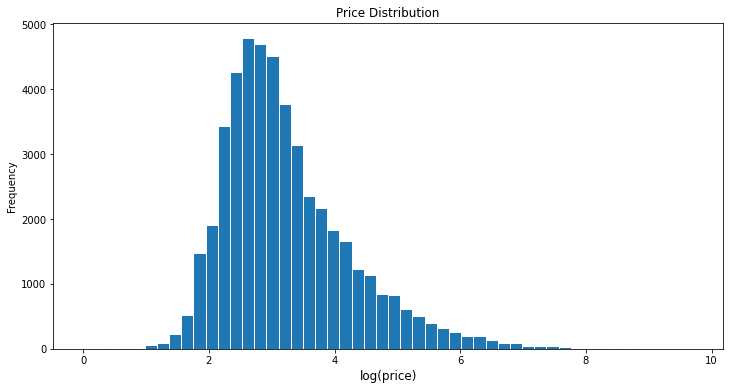

In [19]:
#Change to Gaussian Distribution
np.log(df['Price']+1).plot.hist(bins=50, figsize=(12,6), edgecolor='white')
plt.xlabel('log(price)', fontsize=12)
plt.title('Price Distribution', fontsize=12)

In [0]:
y= ss.fit_transform(df['Price'].to_numpy().reshape(-1,1))

**BRAND**

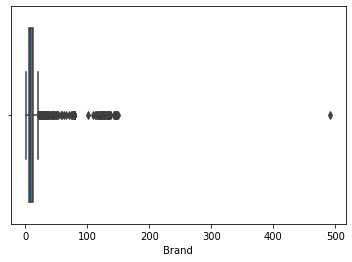

In [21]:
sns.boxplot(x=df.Brand.str.len())

In [22]:
df.Brand.str.len().describe()

count    48001.000000
mean        10.245516
std          9.302813
min          1.000000
25%          6.000000
50%          8.000000
75%         12.000000
max        492.000000
Name: Brand, dtype: float64

Brand Name have some outliers with respect to length. Also,it may contains punctuation so we remove them and slice them to an average length.

In [0]:
df['Brand']=df['Brand'].str.lower()
df['Brand']=df['Brand'].str.replace('[^\w\s]','')
df['Brand']=df['Brand'].str.slice(0,15)

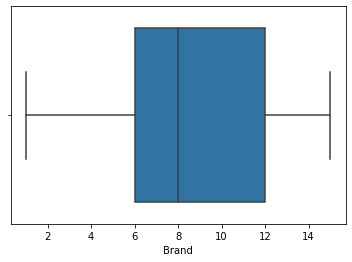

In [24]:
sns.boxplot(x=df.Brand.str.len())

**TITLE**

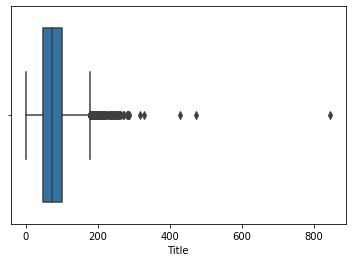

In [25]:
sns.boxplot(x=df.Title.str.len())

In [26]:
df.Title.str.len().describe()

count    48001.000000
mean        80.948480
std         42.894967
min          1.000000
25%         49.000000
50%         72.000000
75%        101.000000
max        845.000000
Name: Title, dtype: float64

Title of the product contains numeric values and additional characters.It also includes brand name. To avoid multiple Occurence of words we should remove them.

In [0]:
df['Title']=df['Title'].str.lower()
df['Title']=df['Title'].str.replace('\d+','')
df['Title']=df['Title'].str.replace('[^\w\s]','')
df['Title'] = df['Title'].replace(to_replace=r'\b'+df['Brand']+r'\b', value='',regex=True)
df['Title']=df['Title'].str.slice(0,100)

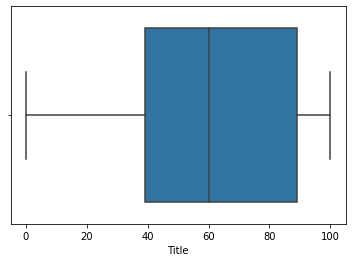

In [28]:
sns.boxplot(x=df.Title.str.len())

**HIGHLIGHTS**

In [29]:
df.Highlights.str.len().describe()

count    48001.000000
mean       433.817691
std        410.318067
min          1.000000
25%        144.000000
50%        297.000000
75%        601.000000
max       4531.000000
Name: Highlights, dtype: float64

Highlights may contains product name and punctuation

In [0]:
df['Highlights']=df['Highlights'].str.replace('[^\w\s]','')
df['Highlights'] = df['Highlights'].replace(to_replace=r'\b'+df['Title']+r'\b', value='',regex=True)

# **Model Building  and Predictions**




**Building Features Matrix for Regression model**

Creating a vocabulary with count from the **Title** name using CountVectorizer

In [31]:
#Count Vectorizer for Title features
vectorizer = CountVectorizer()
X_title = vectorizer.fit_transform(df['Title'])
vectorizer.vocabulary_

{'rpc': 29389,
 'amfm': 1005,
 'antenna': 1211,
 'coaxial': 6877,
 'cable': 4996,
 'packs': 24804,
 'baby': 2231,
 'girl': 14100,
 'cute': 8409,
 'headband': 15546,
 'turban': 36373,
 'head': 15541,
 'wrap': 39121,
 'knotted': 18718,
 'hair': 15050,
 'band': 2515,
 'for': 13019,
 'newborn': 23295,
 'toddler': 35460,
 'and': 1096,
 'children': 6205,
 'pl': 26103,
 'mount': 22446,
 'weaponscarletwepicscarlet': 38338,
 'folding': 12968,
 'highgrade': 15875,
 'binoculars': 3340,
 'compact': 7175,
 'adults': 422,
 'kids': 18461,
 'small': 31856,
 'binocular': 3339,
 'bird': 3386,
 'watching': 38167,
 'outdoo': 24588,
 'inch': 16928,
 'portable': 26614,
 'projection': 27187,
 'screen': 30203,
 'with': 38866,
 'bag': 2362,
 'hd': 15488,
 'foldable': 12960,
 'indoor': 17011,
 'outdoor': 24589,
 'movie': 22502,
 'home': 16145,
 'cinema': 6422,
 'gsd': 14816,
 'gold': 14356,
 'series': 30666,
 'amplifier': 1047,
 'canon': 5265,
 'eos': 11281,
 'rebel': 28249,
 'ti': 35204,
 'dslr': 10148,
 'came

In [32]:
X_title

<48001x40077 sparse matrix of type '<class 'numpy.int64'>'
	with 431539 stored elements in Compressed Sparse Row format>

As **Highlights** contain some irrelvant frequent words (other than stopwords) to penalize them we use tf idf vectorizer.Also remove stopwords from it.

In [0]:
#TF IDF Vectorizer for Highlights features
tv = TfidfVectorizer(max_features=50000, stop_words='english')
X_highlights = tv.fit_transform(df['Highlights'])

In [34]:
X_highlights

<48001x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 1760543 stored elements in Compressed Sparse Row format>

**NOTE:** After analzing the trained model,it is found that this highlights are not much useful as it only contains instructions like "*make sure this fits by entering your model number*".
Therfore it is irrelevant to price predication.
So, for further training we drop this feature.

Treat **Brand** name as a category to predict price using One Hot Encoder 

In [0]:
#One Hot Encoding for Brand features
onehotencoder = OneHotEncoder(categories="auto")
brand=df['Brand'].to_numpy().reshape(-1,1)
X_brand = onehotencoder.fit_transform(brand)

In [36]:
X_brand

<48001x24081 sparse matrix of type '<class 'numpy.float64'>'
	with 48001 stored elements in Compressed Sparse Row format>

In [0]:
#Merge all features matrix
X_final = hstack(( X_title, X_brand, X_rating)).tocsr()

##**ANN** **Model**

As our input matrix is a huge sparese matrix ,a simple machine learning model like multiple regression,simple decision tree not perform so well. A Neural network model may gives better results.

In [0]:
#Spliting dataset into Training and Test only(as we can validation_split option in keras library)
X_train,X_test,y_train,y_test=train_test_split(X_final, y, test_size=0.2, random_state=42)

In [39]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.2)) #Dropout Layers
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.2)) #Dropout Layers
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.2)) #Dropout Layers
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               8212480   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [40]:
NN_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

Train on 30720 samples, validate on 7680 samples
Epoch 1/10
30720/30720 [==============================] - 114s 4ms/step - loss: 1.0512 - mae: 0.2508 - val_loss: 0.9312 - val_mae: 0.2027
Epoch 2/10
30720/30720 [==============================] - 113s 4ms/step - loss: 0.8044 - mae: 0.1962 - val_loss: 0.8387 - val_mae: 0.2078
Epoch 3/10
30720/30720 [==============================] - 113s 4ms/step - loss: 0.5141 - mae: 0.1642 - val_loss: 0.7549 - val_mae: 0.1939
Epoch 4/10
30720/30720 [==============================] - 113s 4ms/step - loss: 0.3385 - mae: 0.1440 - val_loss: 0.7410 - val_mae: 0.2051
Epoch 5/10
30720/30720 [==============================] - 114s 4ms/step - loss: 0.3197 - mae: 0.1329 - val_loss: 0.7549 - val_mae: 0.1982
Epoch 6/10
30720/30720 [==============================] - 113s 4ms/step - loss: 0.2655 - mae: 0.1210 - val_loss: 0.8644 - val_mae: 0.1989
Epoch 7/10
30720/30720 [==============================] - 114s 4ms/step - loss: 0.1906 - mae: 0.1101 - val_loss: 1.0689 - v

In [0]:
y_pred_NN=NN_model.predict(X_test)

In [42]:
mean_absolute_error(y_test, y_pred_NN)

0.1995932001329469

Although the model overfits but overall it performs well.
We can optimize more by adding more dropout rate or adding weight decay constraints.
Lets try other model.


##**CatBoost Model**

It is gradient boosting technique based on decision tree.

In [0]:
#Spliting dataset into Training, Validation and Test set
X_train,X_rest,y_train,y_rest=train_test_split(X_final, y, test_size=0.2, random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

In [47]:
#Making Pool variables
train_pool = Pool(X_train, y_train)
val_pool = Pool(X_val, y_val) 

#Create a model
CB_model = CatBoostRegressor(iterations=1000,depth=6,loss_function='MAPE',eval_metric='MAPE') 

#Fitting the model
CB_model.fit(train_pool, eval_set=val_pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.1334209	test: 0.1360011	best: 0.1360011 (0)	total: 343ms	remaining: 5m 42s
1:	learn: 0.1333144	test: 0.1358866	best: 0.1358866 (1)	total: 630ms	remaining: 5m 14s
2:	learn: 0.1332107	test: 0.1357709	best: 0.1357709 (2)	total: 924ms	remaining: 5m 7s
3:	learn: 0.1331049	test: 0.1356474	best: 0.1356474 (3)	total: 1.22s	remaining: 5m 3s
4:	learn: 0.1330447	test: 0.1355762	best: 0.1355762 (4)	total: 1.51s	remaining: 5m
5:	learn: 0.1329597	test: 0.1354807	best: 0.1354807 (5)	total: 1.81s	remaining: 4m 59s
6:	learn: 0.1328903	test: 0.1353914	best: 0.1353914 (6)	total: 2.1s	remaining: 4m 58s
7:	learn: 0.1328232	test: 0.1353046	best: 0.1353046 (7)	total: 2.4s	remaining: 4m 57s
8:	learn: 0.1327569	test: 0.1352333	best: 0.1352333 (8)	total: 2.69s	remaining: 4m 56s
9:	learn: 0.1327074	test: 0.1351748	best: 0.1351748 (9)	total: 2.99s	remaining: 4m 56s
10:	learn: 0.1326524	test: 0.1351127	best: 0.1351127 (10)	total: 3.28s	remaining: 4m 55s
11:	learn: 0.1326084	test: 0.1350592	best: 0.1350

In [0]:
y_pred_CB=CB_model.predict(X_test)

In [49]:
mean_absolute_error(y_test, y_pred_CB)

0.19504206245777778

The catboost model trained well and gives good validation score.
However test error is slighly more than both of the error.
This can be improve with more data or adding more regularization parameters.
Also we can use inbuilt categorical variables option of catboost on brand. 
